Libraries 

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D


### 1.1  

Graphing $f(x) = exp(sin(x))$ numerically and exactly


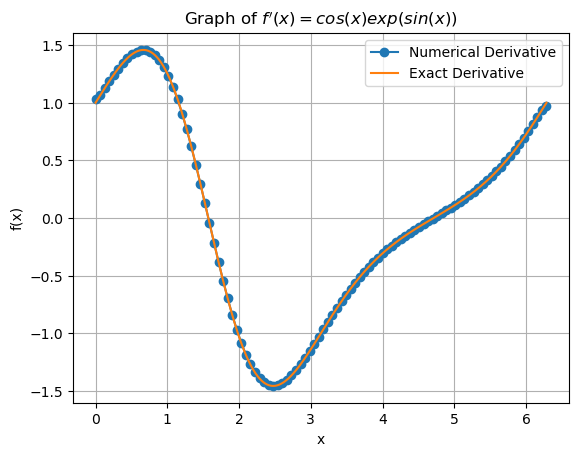

In [98]:
fxVal = lambda x: np.exp(np.sin(x))
fxValDeriv = lambda x: np.cos(x)*np.exp(np.sin(x))
x = np.linspace(0, 2*np.pi, 10000)
y = fxValDeriv(x)

def derivativeFx(n):
    x_0 = np.linspace(0, 2*np.pi, n)
    h = x_0[1] - x_0[0]

    solutionMatrix = np.zeros((len(x_0), len(x_0)))

    solutionMatrix[0,0] = -2
    solutionMatrix[0,1] = 2


    solutionMatrix[len(x_0) -1, len(x_0) -1] = 2
    solutionMatrix[len(x_0) -1, len(x_0) -2] = -2


    for i in range(1, len(x_0) - 1):
        solutionMatrix[i,i-1] = -1
        solutionMatrix[i,i+1] = 1
        

    fprime = (solutionMatrix @ fxVal(x_0))/(2*h)

    return  x_0, fprime

x_0, fprime = derivativeFx(100)
plt.plot(x_0, fprime, 'o-', label='Numerical Derivative')
plt.plot(x, y, label='Exact Derivative')        

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graph of $f'(x) = cos(x)exp(sin(x))$")
plt.legend()
plt.grid()
plt.show()

### 1.2
relative error

In [94]:

n = range(4, 1000)
errorInf = np.zeros(len(n))
errorl2 = np.zeros(len(n))

for i in n:
    x0, fprime = derivativeFx(i)
      
    trueVals = fxValDeriv(x0) 
    

    errorInf[i-4] = np.linalg.norm(fprime - trueVals, ord=np.inf) / np.linalg.norm(trueVals, ord=np.inf)
    errorl2[i-4] = np.linalg.norm(fprime - trueVals) / np.linalg.norm(trueVals)


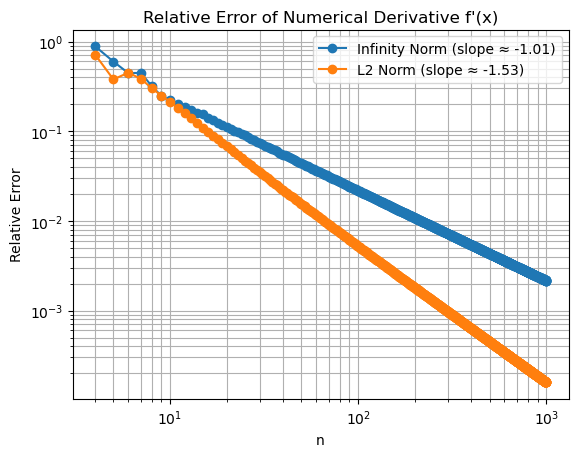

In [105]:
start_idx = 15
n_slice = np.array(n)[start_idx:]
errorInf_slice = np.array(errorInf)[start_idx:]
errorl2_slice  = np.array(errorl2)[start_idx:]


slope_inf, intercept_inf = np.polyfit(np.log(n_slice), np.log(errorInf_slice), 1)
slope_l2,  intercept_l2  = np.polyfit(np.log(n_slice), np.log(errorl2_slice), 1)


plt.loglog(n, errorInf, 'o-', label=f'Infinity Norm (slope ≈ {slope_inf:.2f})')
plt.loglog(n, errorl2, 'o-',  label=f'L2 Norm (slope ≈ {slope_l2:.2f})')

plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title("Relative Error of Numerical Derivative f'(x)")
plt.legend()
plt.grid(True, which='both')
plt.show()

### 2.1
Second Derivative

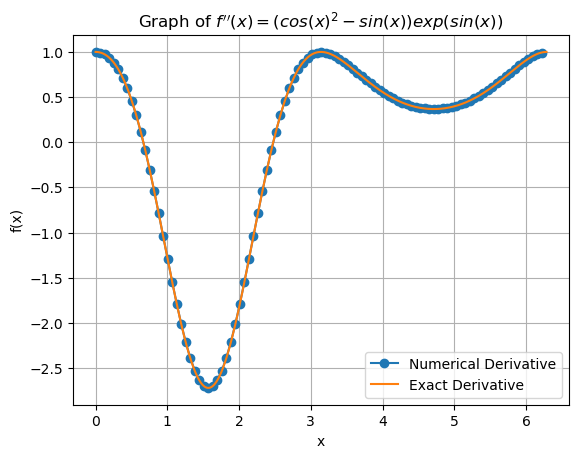

In [107]:
fxVal = lambda x: np.exp(np.sin(x))
fxValDeriv2 = lambda x: np.exp(np.sin(x)) * (np.cos(x)**2 - np.sin(x))
x = np.linspace(0, 2*np.pi, 10000)
y = fxValDeriv2(x)

def derivativeFx2(n):
    x_0 = np.linspace(0, 2*np.pi, n, endpoint=False)
    h = x_0[1] - x_0[0]

    solutionMatrix = np.zeros((len(x_0), len(x_0)))

    solutionMatrix[0,0] = -2
    solutionMatrix[0,1] = 1
    solutionMatrix[0, len(x_0) -1 ] = 1  


    solutionMatrix[len(x_0) -1, len(x_0) -1] = -2
    solutionMatrix[len(x_0) -1, len(x_0) -2] = 1
    solutionMatrix[len(x_0) -1, 0] = 1


    for i in range(1, len(x_0) - 1):
        solutionMatrix[i,i-1] = 1
        solutionMatrix[i,i+1] = 1
        solutionMatrix[i,i] = -2
        
    
    fprime = (solutionMatrix @ fxVal(x_0))/((h**2))
    
    return  x_0, fprime

x_0, fprime = derivativeFx2(100)
plt.plot(x_0, fprime, 'o-', label='Numerical Derivative')
plt.plot(x, y, label='Exact Derivative')        

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graph of $f''(x) = (cos(x)^2 - sin(x))exp(sin(x))$")
plt.legend()
plt.grid()
plt.show()

### 2.2
Error

In [108]:

n = range(4, 1000)
errorInf = np.zeros(len(n))
errorl2 = np.zeros(len(n))

for i in n:
    x0, fprime = derivativeFx2(i)
      
    trueVals = fxValDeriv2(x0) 
    

    errorInf[i-4] = np.linalg.norm(fprime - trueVals, ord=np.inf) / np.linalg.norm(trueVals, ord=np.inf)
    errorl2[i-4] = np.linalg.norm(fprime - trueVals) / np.linalg.norm(trueVals)

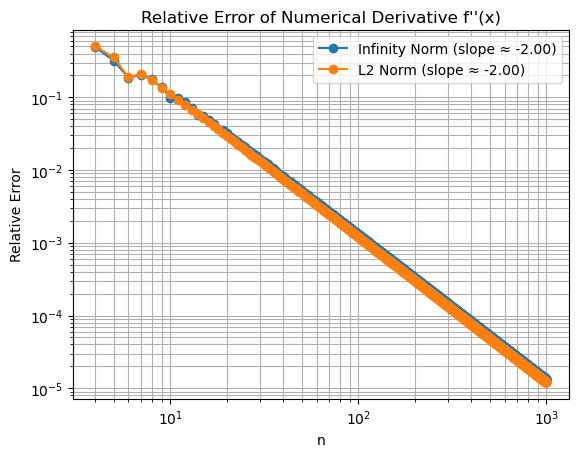

In [109]:
start_idx = 15
n_slice = np.array(n)[start_idx:]
errorInf_slice = np.array(errorInf)[start_idx:]
errorl2_slice  = np.array(errorl2)[start_idx:]


slope_inf, intercept_inf = np.polyfit(np.log(n_slice), np.log(errorInf_slice), 1)
slope_l2,  intercept_l2  = np.polyfit(np.log(n_slice), np.log(errorl2_slice), 1)


plt.loglog(n, errorInf, 'o-', label=f'Infinity Norm (slope ≈ {slope_inf:.2f})')
plt.loglog(n, errorl2, 'o-',  label=f'L2 Norm (slope ≈ {slope_l2:.2f})')

plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title("Relative Error of Numerical Derivative f''(x)")
plt.legend()
plt.grid(True, which='both')
plt.show()

### 3
$\frac{d^2u }{dx^2} + sin(x) \frac{du}{dx} + u(x) = f(x)$  

with test solution $u(x) = sin(x)$

from this we know $f(x) =  cos(x)sin(x)$


We'll assume neumann bcs $u'(0) = a, u'(5) = b$


In [ ]:
def odeP3(n):
    x_0 = np.linspace(0, 5, n)
    h = x_0[1] - x_0[0]
    f = np.cos(x_0)*np.sin(x_0)
    
    
    solutionMatrix = np.zeros((len(x_0), len(x_0)))

    solutionMatrix[0,0] = -2
    solutionMatrix[0,1] = 2



    solutionMatrix[len(x_0) -1, len(x_0) -1] = -2
    solutionMatrix[len(x_0) -1, len(x_0) -2] = 2


    for i in range(1, len(x_0) - 1):
        solutionMatrix[i,i-1] = 1
        solutionMatrix[i,i+1] = 1
        solutionMatrix[i,i] = -2
        
    
    udoubleprime = solutionMatrix/((h**2))
    
    f[0] += 2*np.cos(0)/h
    f[-1] -= 2*np.cos(5)/h
    
    solutionMatrix = np.zeros((len(x_0), len(x_0)))

    solutionMatrix[0,0] = -2
    solutionMatrix[0,1] = 2


    solutionMatrix[len(x_0) -1, len(x_0) -1] = 2
    solutionMatrix[len(x_0) -1, len(x_0) -2] = -2


    for i in range(1, len(x_0) - 1):
        solutionMatrix[i,i-1] = -1
        solutionMatrix[i,i+1] = 1
        
    sinMatrix = np.diag(np.sin(x_0))
                   
    uprime =   sinMatrix @ (solutionMatrix /(2*h))
    
    u = np.diag(np.ones(len(x_0)))
    
    A = udoubleprime + uprime + u
    
    
    
    fprime = np.linalg.solve(A, f)

    return  x_0, fprime

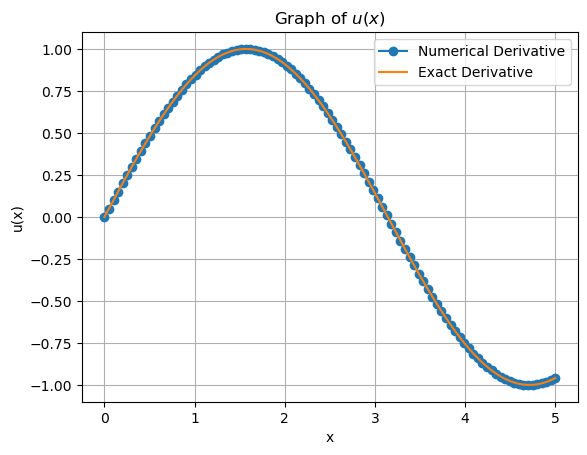

In [143]:
x_0, fprime = odeP3(100)
x0 = np.linspace(0, 5, 1000)
plt.plot(x_0, fprime, 'o-', label='Numerical Derivative')
plt.plot(x0, np.sin(x0), label='Exact Derivative')        

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title("Graph of $u(x)$")
plt.legend()
plt.grid()
plt.show()

In [1]:
n = range(4, 1000)
errorInf = np.zeros(len(n))
errorl2 = np.zeros(len(n))

for i in n:
    x0, fprime = odeP3(i)
      
    trueVals = np.sin(x0) 
    

    errorInf[i-4] = np.linalg.norm(fprime - trueVals, ord=np.inf) / np.linalg.norm(trueVals, ord=np.inf)
    errorl2[i-4] = np.linalg.norm(fprime - trueVals) / np.linalg.norm(trueVals)

NameError: name 'np' is not defined

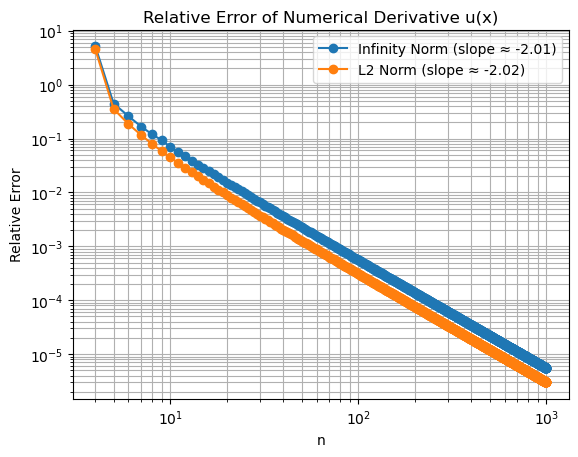

In [146]:
start_idx = 15
n_slice = np.array(n)[start_idx:]
errorInf_slice = np.array(errorInf)[start_idx:]
errorl2_slice  = np.array(errorl2)[start_idx:]


slope_inf, intercept_inf = np.polyfit(np.log(n_slice), np.log(errorInf_slice), 1)
slope_l2,  intercept_l2  = np.polyfit(np.log(n_slice), np.log(errorl2_slice), 1)


plt.loglog(n, errorInf, 'o-', label=f'Infinity Norm (slope ≈ {slope_inf:.2f})')
plt.loglog(n, errorl2, 'o-',  label=f'L2 Norm (slope ≈ {slope_l2:.2f})')

plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title("Relative Error of Numerical Derivative u(x)")
plt.legend()
plt.grid(True, which='both')
plt.show()

### 4
Possion equation $\nabla^2 u(x) = f(x,y)$  

with $u(x,y) = sin(x)cos(y)$

$f(x, y) = -2sin(x)cos(y) $

with Dirichlet BCs, $u(x,y)$ is zero on boundaries

In [36]:
def poisson2D(n):
    dxx = np.zeros((n, n))
    x = np.linspace(0, 5, n)      
    y = np.linspace(0, 5, n)
    h = x[1] - x[0]
    
    dxx[0,0] = -2
    dxx[0,1] = 1
    
    dxx[n - 1, n-1] = -2
    dxx[n - 1, n-2] = 1
    
    
    for i in range(1, n - 1):
        dxx[i,i-1] = 1
        dxx[i,i+1] = 1
        dxx[i,i] = -2
    dxx = dxx/(h**2)
    solutionMatrix = np.kron(np.eye(n), dxx) + np.kron(dxx, np.eye(n))
    
    f = np.zeros(n*n)
    for i in range(n):
        for j in range(n):
            f[i*n + j] = -2*np.sin(x[i])*np.cos(y[j])
            if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                f[i*n + j] = np.sin(x[i])*np.cos(y[j])
                solutionMatrix[i*n + j, :] = 0
                solutionMatrix[i*n + j, i*n + j] = 1
            
                
    u = np.linalg.solve(solutionMatrix, f)
    return x, y, u.reshape((n, n))

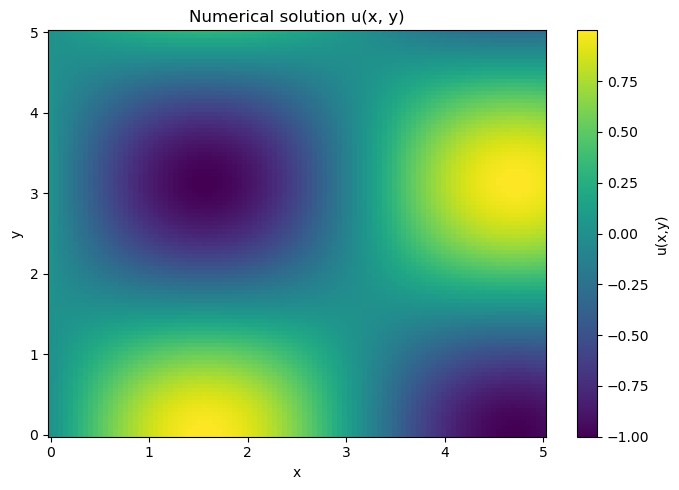

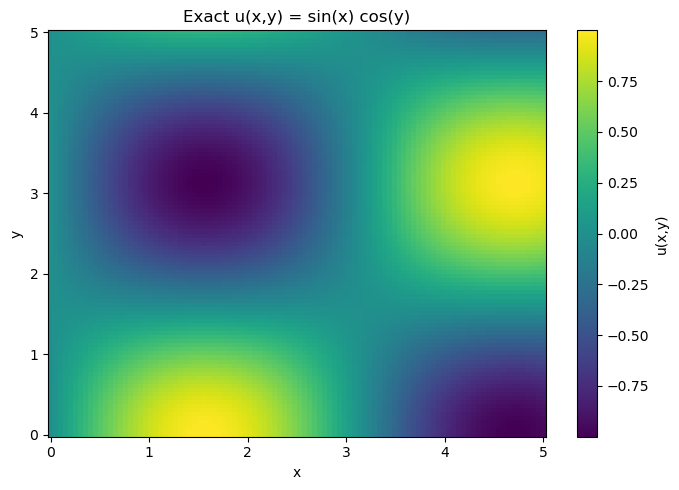

In [37]:
x, y, u_num = poisson2D(100)          # assumes poisson2D is already defined
X, Y = np.meshgrid(x, y, indexing='ij')

# exact function
u_exact = np.sin(X) * np.cos(Y)

# -------- Plot 1: Numerical solution heatmap --------
plt.figure(figsize=(7,5))
h1 = plt.pcolormesh(X, Y, u_num, shading='auto')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Numerical solution u(x, y)')
plt.colorbar(h1, label='u(x,y)')
plt.tight_layout()
plt.show()

# -------- Plot 2: Exact f(x,y) = sin(x) cos(y) heatmap --------
plt.figure(figsize=(7,5))
h2 = plt.pcolormesh(X, Y, u_exact, shading='auto')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Exact u(x,y) = sin(x) cos(y)')
plt.colorbar(h2, label='u(x,y)')
plt.tight_layout()
plt.show()

### 4.1 
error


In [38]:
n = range(4, 100)
errorInf = np.zeros(len(n))
errorl2 = np.zeros(len(n))

for  i in n:
    x0, y0, u_num = poisson2D(i)                 # u_num shape: (i, i)
    X, Y = np.meshgrid(x0, y0, indexing='ij')
    u_exact = np.sin(X) * np.cos(Y)

    diff = (u_num - u_exact).ravel()
    exact = u_exact.ravel()

    # L∞ (vector sup norm) via np.linalg.norm on 1D
    errorInf[i-4] = np.linalg.norm(diff, ord=np.inf) / np.linalg.norm(exact, ord=np.inf)

    # L2 (Euclidean on flattened array) via np.linalg.norm
    errorl2[i-4]  = np.linalg.norm(diff) / np.linalg.norm(exact)



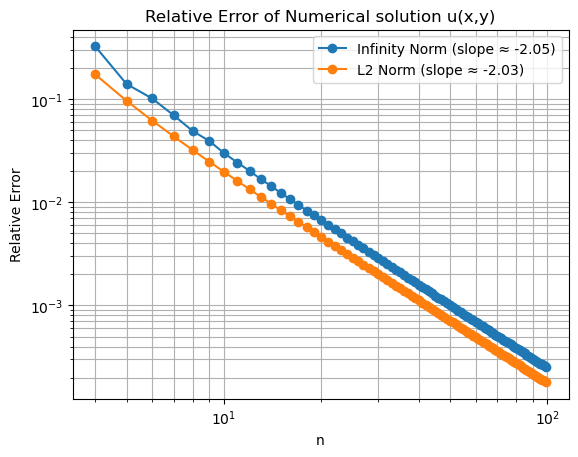

In [39]:
start_idx = 15
n_slice = np.array(n)[start_idx:]
errorInf_slice = np.array(errorInf)[start_idx:]
errorl2_slice  = np.array(errorl2)[start_idx:]


slope_inf, intercept_inf = np.polyfit(np.log(n_slice), np.log(errorInf_slice), 1)
slope_l2,  intercept_l2  = np.polyfit(np.log(n_slice), np.log(errorl2_slice), 1)


plt.loglog(n, errorInf, 'o-', label=f'Infinity Norm (slope ≈ {slope_inf:.2f})')
plt.loglog(n, errorl2, 'o-',  label=f'L2 Norm (slope ≈ {slope_l2:.2f})')

plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title("Relative Error of Numerical solution u(x,y)")
plt.legend()
plt.grid(True, which='both')
plt.show()

### 4.2 

Trying with neumann bcs 

$u'(0, y) = a(y), u'(5, y) =b(y), u'(x, 0) =c(x), u'(x, 5) = d(x)$



In [43]:
def poisson2Dneumman(n):
    dxx = np.zeros((n, n))
    x = np.linspace(0, 5, n)      
    y = np.linspace(0, 5, n)
    h = x[1] - x[0]
    
    dxx[0,0] = -2
    dxx[0,1] = 2
    
    dxx[n - 1, n-1] = -2
    dxx[n - 1, n-2] = 2
    
    
    for i in range(1, n - 1):
        dxx[i,i-1] = 1
        dxx[i,i+1] = 1
        dxx[i,i] = -2
    dxx = dxx/(h**2)
    solutionMatrix = np.kron(np.eye(n), dxx) + np.kron(dxx, np.eye(n))
    
    f = np.zeros(n*n)
    for i in range(n):
        for j in range(n):
            f[i*n + j] = -2*np.sin(x[i])*np.cos(y[j])
            if i == 0:
                f[i*n + j] -= 2*np.cos(x[i])*np.cos(y[j])/(h)
            if i == n - 1:
                f[i*n + j] += 2*np.cos(x[i])*np.cos(y[j])/(h)   
            if j == 0:
                f[i*n + j] += 2*np.sin(x[i])*np.sin(y[j])/(h)
            if j == n - 1:
                f[i*n + j] -= 2*np.sin(x[i])*np.sin(y[j])/(h)
                
    u = np.linalg.solve(solutionMatrix, f)
    z = np.ones(n*n)
    print(np.linalg.norm(solutionMatrix @ z))        # ~ 0
    print(np.linalg.matrix_rank(solutionMatrix), n*n)
    return x, y, u.reshape((n, n))

1.12544227438453e-11
9999 10000


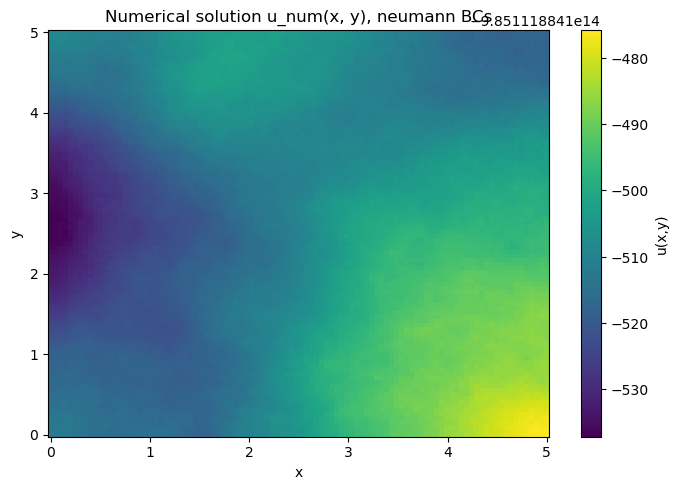

In [44]:
x, y, u_num = poisson2Dneumman(100)          # assumes poisson2D is already defined
X, Y = np.meshgrid(x, y, indexing='ij')

# exact function
u_exact = np.sin(X) * np.cos(Y)

# -------- Plot 1: Numerical solution heatmap --------
plt.figure(figsize=(7,5))
h1 = plt.pcolormesh(X, Y, u_num, shading='auto')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Numerical solution u_num(x, y), neumann BCs')
plt.colorbar(h1, label='u(x,y)')
plt.tight_layout()
plt.show()


Why this doesn't work: with the Possion equation we normally want defined boundry conditions on u; if we only constrict u'(x,y) we wont get a unique solution.

In the matrix perspective we wont have enough equations; this will cause values to be in the matrix to be free and have non-unique solutions. 
